### O problema
Quais devem ser as dimensões de uma lata cilíndrica de volume v para o menor gasto de material?

### Modelagem matemática
Altura: a  
Raio: r  
Volume:  
$V(a, r) = \pi ar^2$  
$v = \pi ar^2$

Área (Área da tampa e da base + Área da parede):  
$A(a, r) = 2\pi r^2 + 2\pi ra = 2\pi r(r + a)$

**Modelo:**  
$\min\limits_{a, r}\quad 2\pi r(r + a)$  
$\text{s.a: }v = \pi ar^2$

### Visualizando o problema

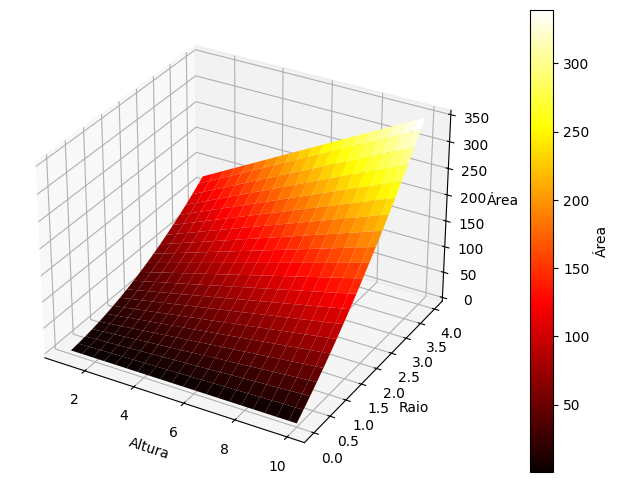

In [2]:
import numpy as np
import matplotlib.pyplot as pp

vol = 50.0
a_mx = 10.0

def a2r(a):
    return (vol / (np.pi * a)) ** 0.5

N = 60
a = np.linspace(1.0, a_mx, N)
r = np.linspace(0.0, np.max(a2r(a)), N)
aa, rr = np.meshgrid(a, r)

def A(a, r):
    return 2 * np.pi * r * (r + a)

Z = A(aa, rr)
fig = pp.figure(figsize=(15, 6))
rs = cs = 3
alpha = 1.0
cmap = pp.cm.hot
ax = fig.add_subplot(1, 1, 1, projection = '3d')
surf = ax.plot_surface(aa, rr, Z, alpha = alpha, cmap = cmap, rstride = rs, cstride = cs, linewidth = 0)
ax.set_xlabel('Altura')
ax.set_ylabel('Raio')
ax.set_zlabel('Área')
pp.colorbar(surf, label = 'Área')
pp.show()

### Simplificando o Modelo

Modelo:  
$\min\limits_{a, r}\quad 2\pi r(r + a)$  
$\text{s.a: }v = \pi ar^2$

Restrição:  
$v = πar²$  
$r = \sqrt{\frac{v}{\pi a}}$

$\min\limits_{a, r}\quad 2\pi r(r + a) = 2\pi \sqrt{\frac{v}{\pi a}}(\sqrt{\frac{v}{\pi a}} + a)$

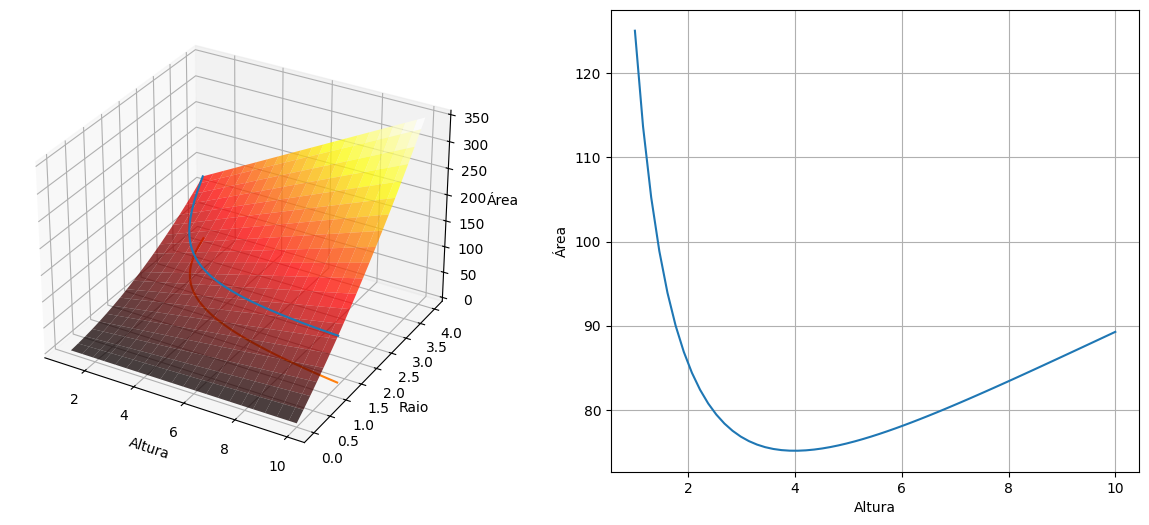

In [3]:
fig = pp.figure(figsize=(15, 6))

ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.plot3D(a, a2r(a), A(a, a2r(a)), zorder = 10)
ax.plot3D(a, a2r(a), np.zeros_like(a), zorder = 1)
surf = ax.plot_surface(aa, rr, Z, alpha = alpha * 0.75, cmap = cmap, rstride = rs, cstride = cs, linewidth = 0)
ax.set_xlabel('Altura')
ax.set_ylabel('Raio')
ax.set_zlabel('Área')
ax = fig.add_subplot(1, 2, 2)
ax.plot(a, A(a, a2r(a)))
ax.set_xlabel('Altura')
ax.set_ylabel('Área')
ax.grid()
pp.show()

Observando o segundo gráfico notamos que, pela adoção de v = 50, a Altura ideal está próximo de 4.

Este é um problema de uma variável (problema 'escalar'), logo basta utilizar a função `scipy.optimize.minimize_scalar`.

In [ ]:
import scipy.optimize as opt
import numpy as np

vol = 50

def A(a, r):
    return 2 * np.pi * r * (r + a)

def f(a):
    return A(a, (vol / (np.pi * a)) ** 0.5)

res = opt.minimize_scalar(f, bracket = (1.0e-4, 10))    # bracket: intervalo chutado com o otimizador dentro de acordo com o gráfico.
a_opt = res.x
r_opt = (vol / (np.pi * a_opt)) ** 0.5
print(a_opt, r_opt)

3.992945364296456 1.9964727274171965


Obs.: o raio é de fato metade da altura.

In [5]:
print(res)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 75.1325069828408
       x: 3.992945364296456
     nit: 15
    nfev: 18


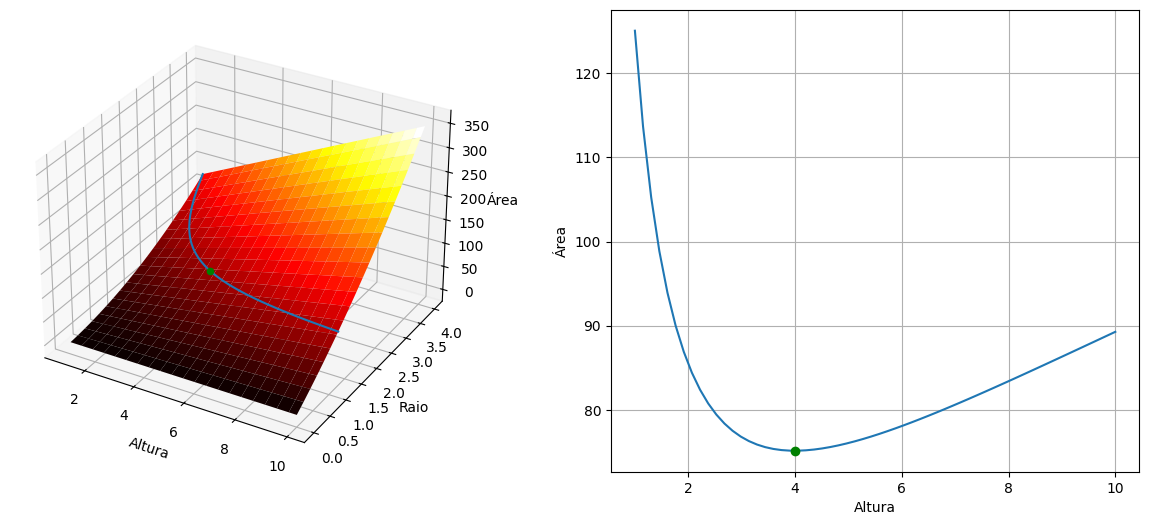

Altura:  3.992945364296456
Raio:  1.9964727274171965
Área:  75.1325069828408
Volume:  49.99999999999999


In [6]:
fig = pp.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 2, 1, projection = '3d', computed_zorder = False)
ax.plot3D(a, a2r(a), A(a, a2r(a)), zorder = 10)
surf = ax.plot_surface(aa, rr, Z, alpha = alpha, cmap = cmap, rstride = rs, cstride = cs, linewidth = 0)
ax.scatter3D(a_opt, a2r(a_opt), A(a_opt, a2r(a_opt)), c = 'green', zorder = 10)
ax.set_xlabel('Altura')
ax.set_ylabel('Raio')
ax.set_zlabel('Área')
ax = fig.add_subplot(1, 2, 2)
ax.plot(a, A(a, a2r(a)))
ax.scatter(a_opt, A(a_opt, a2r(a_opt)), c = 'green', zorder = 10)
ax.set_xlabel('Altura')
ax.set_ylabel('Área')
ax.grid()
pp.show()
print('Altura: ', a_opt)
print('Raio: ', a2r(a_opt))
print('Área: ', f(a_opt))
print('Volume: ', np.pi * a2r(a_opt) ** 2 * a_opt)

In [8]:
help(opt.minimize_scalar)

Help on function minimize_scalar in module scipy.optimize._minimize:

minimize_scalar(fun, bracket=None, bounds=None, args=(), method=None, tol=None, options=None)
    Local minimization of scalar function of one variable.

    Parameters
    ----------
    fun : callable
        Objective function.
        Scalar function, must return a scalar.

        Suppose the callable has signature ``f0(x, *my_args, **my_kwargs)``, where
        ``my_args`` and ``my_kwargs`` are required positional and keyword arguments.
        Rather than passing ``f0`` as the callable, wrap it to accept
        only ``x``; e.g., pass ``fun=lambda x: f0(x, *my_args, **my_kwargs)`` as the
        callable, where ``my_args`` (tuple) and ``my_kwargs`` (dict) have been
        gathered before invoking this function.

    bracket : sequence, optional
        For methods 'brent' and 'golden', `bracket` defines the bracketing
        interval and is required.
        Either a triple ``(xa, xb, xc)`` satisfying ``xa <